# Foi solicitado gráficos para os relatórios dos meses de Março, Abril, Maio, Junho e Dezembro

## Os gráficos deveram relacionar 
- Idade da mãe x Escolaridade da mãe
- Histograma de Peso
- APGAR 5  X Peso
- APGAR 5 X Tempo de Gestação
- Quantidade de vezes que não foi realizado o APGAR5 naquele mês
- Quantidade de Pai ausente e Escolaridade da mãe

In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Lista com os meses solicitados
meses = ["MAR", "ABR", "MAI", "JUN", "DEZ"]

In [3]:
pwd

'C:\\Users\\carlo\\PycharmProjects\\EBAC\\Ciencia_Dados\\EBAC\\Modulo14\\Scripting'

In [4]:
# Criando o dataframe
sinasc = pd.read_csv("..\Support_Exercise_M14\input\SINASC_RO_2019_MAR.csv")

In [5]:
sinasc.head()

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI
0,19,Masculino,9.0,10.0,3685,4,2019-02-19,37 a 41 semanas,Única,8 a 11 anos,26.0
1,29,Feminino,8.0,9.0,3055,4,2019-02-21,37 a 41 semanas,Única,8 a 11 anos,24.0
2,37,Feminino,8.0,10.0,3460,4,2019-02-25,37 a 41 semanas,Única,8 a 11 anos,32.0
3,30,Feminino,9.0,10.0,2982,3,2019-03-20,37 a 41 semanas,Única,12 anos ou mais,24.0
4,30,Feminino,8.0,10.0,3310,4,2019-03-23,37 a 41 semanas,Única,8 a 11 anos,27.0


In [6]:
sinasc.shape

(6844, 11)

In [7]:
sinasc.isna().sum()

IDADEMAE        0
SEXO            0
APGAR1         24
APGAR5         28
PESO            0
CONSULTAS       0
DTNASC          0
GESTACAO      323
GRAVIDEZ       15
ESCMAE         73
IDADEPAI     4798
dtype: int64

In [8]:
type(sinasc.iloc[6839,10])

numpy.float64

In [9]:
sinasc.loc[sinasc["APGAR1"].isnull()].head()

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI
1408,13,Feminino,NaN,NaN,3295,2,2019-02-27,32 a 36 semanas,Única,4 a 7 anos,NaN
1409,28,Masculino,NaN,NaN,2560,3,2019-02-08,32 a 36 semanas,Única,8 a 11 anos,NaN
1488,25,Masculino,NaN,NaN,2500,4,2019-03-21,37 a 41 semanas,Única,8 a 11 anos,NaN
1493,19,Feminino,NaN,NaN,3250,2,2019-03-21,37 a 41 semanas,Única,8 a 11 anos,NaN
2346,29,Masculino,NaN,NaN,3535,4,2019-01-29,37 a 41 semanas,Única,4 a 7 anos,32.0


### Função para plotar os gráficos 

In [10]:
sinasc["GRAVIDEZ"].value_counts()

GRAVIDEZ
Única    6710
Dupla     119
Name: count, dtype: int64

Text(0.5, 1.0, 'Relação entre a idade da mãe e sua escolaidade')

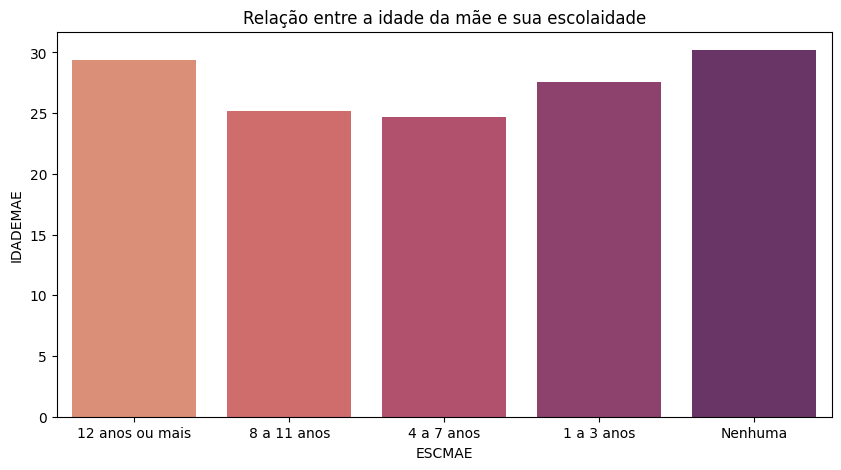

In [11]:
# Idade da mãe x Escolaridade

fig, axes = plt.subplots(figsize=(10,5))

sns.barplot(y= "IDADEMAE", x="ESCMAE", data=sinasc, errorbar=None, palette="flare", order=["12 anos ou mais",
                                                                                          "8 a 11 anos",
                                                                                          "4 a 7 anos",
                                                                                          "1 a 3 anos",
                                                                                          "Nenhuma"] )
axes.set_title("Relação entre a idade da mãe e sua escolaidade")

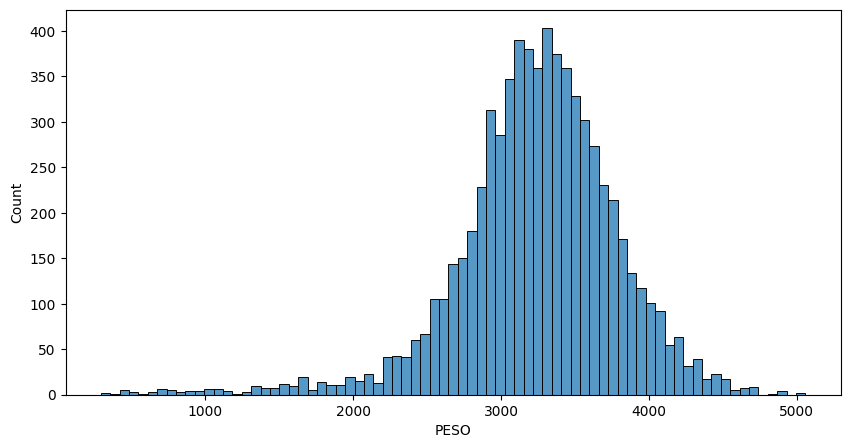

In [12]:
# Histograma Peso
fig, axes = plt.subplots(figsize=(10,5))
sns.histplot(x="PESO", data=sinasc)
plt.show()

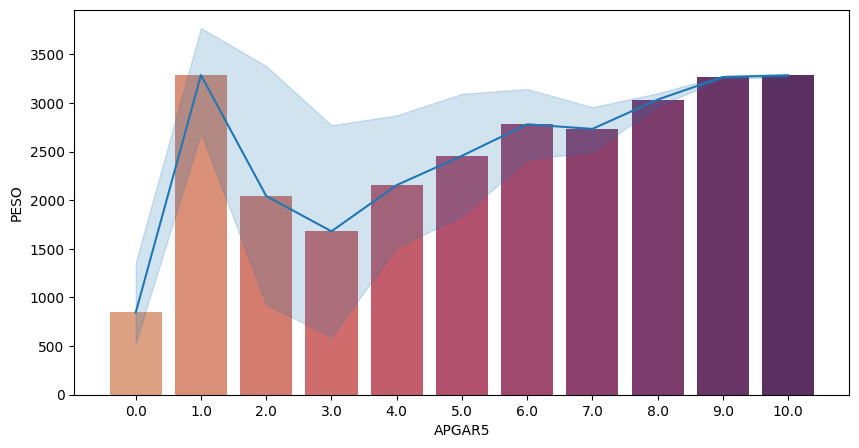

In [13]:
# APGAR 5 X Peso
fig, axes = plt.subplots(figsize=(10,5))

sns.barplot(ax=axes, x="APGAR5", y="PESO", data=sinasc,palette="flare", errorbar=None, estimator="mean")
sns.lineplot(ax=axes, x="APGAR5", y="PESO", data=sinasc)
plt.show()

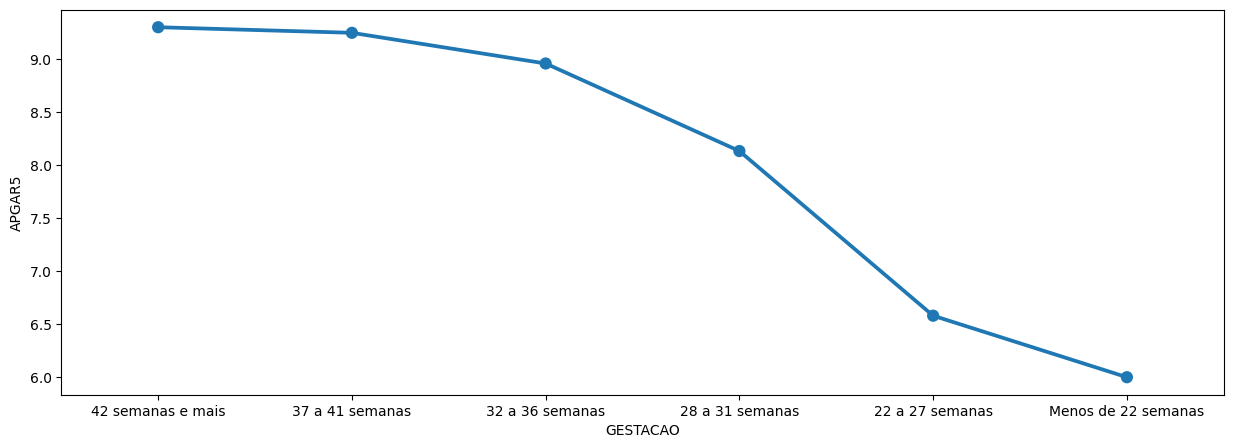

In [14]:
# APGAR 5 x Gestação
fig, axes = plt.subplots(figsize=(15,5))

sns.pointplot(ax=axes, x="GESTACAO", y="APGAR5", data=sinasc, errorbar=None, estimator="mean", order=["42 semanas e mais",
                                                                                                    "37 a 41 semanas",
                                                                                                     "32 a 36 semanas",
                                                                                                     "28 a 31 semanas",
                                                                                                     "22 a 27 semanas",
                                                                                                     "Menos de 22 semanas"])
plt.show()

In [15]:
# Valores não nulos em APGAR5
apgar5 = sinasc["APGAR5"].count()

In [16]:
# Valores nulos
apgar_null = sinasc["APGAR5"].isnull().sum()

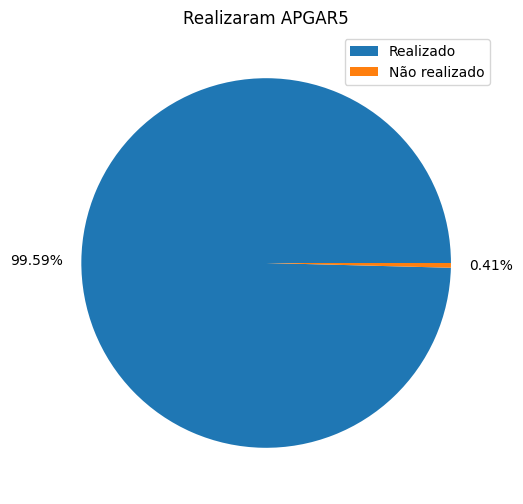

In [17]:
# Quantidade de vezes que não foi realizado o APGAR1 e o APGAR2 naquele mês
fig, axes = plt.subplots(figsize=(6, 6))

plt.pie([apgar5, apgar_null], labels=[f"{round(apgar5*100 / (apgar5 + apgar_null), 2)}%", 
                                      f"{round(apgar_null*100 / (apgar5 + apgar_null), 2)}%"])
plt.title("Realizaram APGAR5")
plt.legend(["Realizado", "Não realizado"],loc='upper right' )
plt.show()


In [18]:
# Quantidade de Pai ausente e Escolaridade da mãe
### DataFrame com a idade do pai nula
idadepai_null = sinasc.loc[sinasc["IDADEPAI"].isnull() == True][["ESCMAE"]].value_counts().to_frame().reset_index()

### DataFrame com a idade do pai não nula
idadepai = sinasc.loc[sinasc["IDADEPAI"].isnull() == False][["ESCMAE"]].value_counts().to_frame().reset_index()

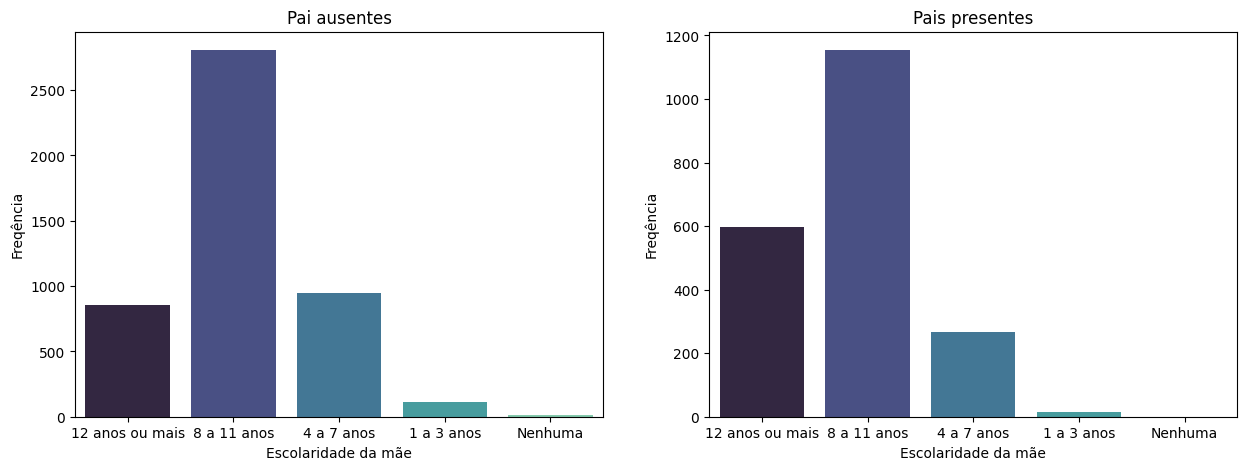

In [19]:
#
fig, axes = plt.subplots(1,2, figsize=(15, 5))

sns.barplot(ax=axes[0], x="ESCMAE", y="count", data=idadepai_null, palette="mako", order=["12 anos ou mais",
                                                                                          "8 a 11 anos",
                                                                                          "4 a 7 anos",
                                                                                          "1 a 3 anos",
                                                                                          "Nenhuma"])
axes[0].set_ylabel("Freqência")
axes[0].set_title("Pai ausentes")
axes[0].set_xlabel("Escolaridade da mãe")

sns.barplot(ax=axes[1], x="ESCMAE", y="count", data=idadepai, palette="mako", order=["12 anos ou mais",
                                                                                          "8 a 11 anos",
                                                                                          "4 a 7 anos",
                                                                                          "1 a 3 anos",
                                                                                          "Nenhuma"])
axes[1].set_ylabel("Freqência")
axes[1].set_title("Pais presentes")
axes[1].set_xlabel("Escolaridade da mãe")
plt.show()

## Criar uma função que gere todos esses gráficos
Lembrando que as solicitações de gráficos para os relatórios são feitas frequentemente, mas sempre os mesmos tipos de gráficos, baseado nisso iremos montar a função

In [20]:
### Criar uma função que gere todos esses gráficos

def plot_relatorios(data=pd.DataFrame(), tipo=str.lower):
    
    if tipo == "idademae ~ escmae":
        plt.close("all")
        fig, axes = plt.subplots(figsize=(15,5))
        sns.barplot(y= "IDADEMAE", x="ESCMAE", data=sinasc, errorbar=None, palette="flare", order=["12 anos ou mais",
                                                                                          "8 a 11 anos",
                                                                                          "4 a 7 anos",
                                                                                          "1 a 3 anos",
                                                                                          "Nenhuma"])
        axes.set_title("Idade da mãe x Escolaidade")
        
        
    elif tipo == "peso":
        plt.close("all")
        fig, axes = plt.subplots(figsize=(15,5))
        sns.histplot(x="PESO", data=sinasc)
        axes.set_title("Histograma do peso")
        axes.set_ylabel("Frequência")
        
        
    elif tipo == "apgar5 ~ peso":
        plt.close("all")
        fig, axes = plt.subplots(figsize=(15,5))
        sns.barplot(ax=axes, x="APGAR5", y="PESO", data=sinasc,palette="flare", errorbar=None, estimator="mean")
        sns.lineplot(ax=axes, x="APGAR5", y="PESO", data=sinasc)
        axes.set_title("APGAR5 x Peso")
        
    elif tipo == "apgar5 ~ gestacao":
        # APGAR 5 x Gestação
        plt.close("all")
        fig, axes = plt.subplots(figsize=(15,5))
        sns.pointplot(ax=axes, x="GESTACAO", y="APGAR5", data=sinasc, errorbar=None, estimator="mean", order=["42 semanas e mais",
                                                                                                            "37 a 41 semanas",
                                                                                                             "32 a 36 semanas",
                                                                                                             "28 a 31 semanas",
                                                                                                             "22 a 27 semanas",
                                                                                                              "Menos de 22 semanas"])
        axes.set_title("APGAR5 x Gestação")
    
    
    elif tipo == "apgar5 ~ nulos":
        # Valores não nulos em APGAR5
        apgar5 = sinasc["APGAR5"].count()
        # Valores nulos
        apgar_null = sinasc["APGAR5"].isnull().sum()
        
        # Quantidade de vezes que não foi realizado o APGAR1 e o APGAR2 naquele mês
        plt.close("all")
        fig, axes = plt.subplots(figsize=(6, 6))

        plt.pie([apgar5, apgar_null], labels=[f"{round(apgar5*100 / (apgar5 + apgar_null), 2)}%", 
                                              f"{round(apgar_null*100 / (apgar5 + apgar_null), 2)}%"])
        plt.title("Realizaram APGAR5")
        plt.legend(["Realizado", "Não realizado"],loc='upper right' )
        
        
    
    elif tipo == "escamae ~ pai":
        plt.close("all")
        # Quantidade de Pai ausente e Escolaridade da mãe
        ### DataFrame com a idade do pai nula
        idadepai_null = sinasc.loc[sinasc["IDADEPAI"].isnull() == True][["ESCMAE"]].value_counts().to_frame().reset_index()

        ### DataFrame com a idade do pai não nula
        idadepai = sinasc.loc[sinasc["IDADEPAI"].isnull() == False][["ESCMAE"]].value_counts().to_frame().reset_index()
        
        fig, axes = plt.subplots(1,2, figsize=(15, 5))

        sns.barplot(ax=axes[0], x="ESCMAE", y="count", data=idadepai_null, palette="mako", order=["12 anos ou mais",
                                                                                                  "8 a 11 anos",
                                                                                                  "4 a 7 anos",
                                                                                                  "1 a 3 anos",
                                                                                                  "Nenhuma"])
        axes[0].set_ylabel("Freqência")
        axes[0].set_title("Pai ausentes")
        axes[0].set_xlabel("Escolaridade da mãe")

        sns.barplot(ax=axes[1], x="ESCMAE", y="count", data=idadepai, palette="mako", order=["12 anos ou mais",
                                                                                                  "8 a 11 anos",
                                                                                                  "4 a 7 anos",
                                                                                                  "1 a 3 anos",
                                                                                                  "Nenhuma"])
        axes[1].set_ylabel("Freqência")
        axes[1].set_title("Pais presentes")
        axes[1].set_xlabel("Escolaridade da mãe")
        
    return None


# Voltando ao problema inicial 

### Para fazer os gráficos dos meses solicitados e de futuros relatórios basta encontrar a pasta onde estão os dados de cada mês e realizar um for entre os arquivos

In [21]:
# Deixando uma lista com as iniciais dos meses solicitados
meses

### Sabemos que todos os arquivos csv começam com : SINASC_RO_2019_

sinasc = pd.read_csv("..\Support_Exercise_M14\input\SINASC_RO_2019_"+meses[0]+".csv")

for i in meses:
    sinasc = pd.read_csv("..\Support_Exercise_M14\input\SINASC_RO_2019_"+i+".csv")
    
    os.makedirs('./figs/'+i, exist_ok=True)
    
    plot_relatorios(data=sinasc, tipo="idademae ~ escmae")
    plt.savefig('./figs/'+i+'/idadema_escmae.png')
    
    plot_relatorios(data=sinasc, tipo="peso")
    plt.savefig('./figs/'+i+'/peso.png')
    
    plot_relatorios(data=sinasc, tipo="apgar5 ~ peso")
    plt.savefig('./figs/'+i+'/apgar5_peso.png')
    
    plot_relatorios(data=sinasc, tipo="apgar5 ~ gestacao")
    plt.savefig('./figs/'+i+'/apgar5_gestacao.png')
    
    plot_relatorios(data=sinasc, tipo="apgar5 ~ nulos")
    plt.savefig('./figs/'+i+'/apgar5_nulos.png')
    
    plot_relatorios(data=sinasc, tipo="escamae ~ pai")
    plt.savefig('./figs/'+i+'/escmae_pai.png')
    
    plt.close("all")
    
    

# Apenas em uma célula

In [22]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Criar uma função que gere todos os gráficos

def plot_relatorios(data=pd.DataFrame(), tipo=str.lower):
    # Gráfico idademae x escmae
    if tipo == "idademae ~ escmae":
        plt.close("all")
        fig, axes = plt.subplots(figsize=(15,5))
        sns.barplot(y= "IDADEMAE", x="ESCMAE", data=sinasc, errorbar=None, palette="flare", order=["12 anos ou mais",
                                                                                          "8 a 11 anos",
                                                                                          "4 a 7 anos",
                                                                                          "1 a 3 anos",
                                                                                          "Nenhuma"])
        axes.set_title("Idade da mãe x Escolaidade")
        
     # Histograma do peso do bebê   
    elif tipo == "peso":
        plt.close("all")
        fig, axes = plt.subplots(figsize=(15,5))
        sns.histplot(x="PESO", data=sinasc)
        axes.set_title("Histograma do peso")
        axes.set_ylabel("Frequência")
        
    # APGAR5 x Peso
    elif tipo == "apgar5 ~ peso":
        plt.close("all")
        fig, axes = plt.subplots(figsize=(15,5))
        sns.barplot(ax=axes, x="APGAR5", y="PESO", data=sinasc,palette="flare", errorbar=None, estimator="mean")
        sns.lineplot(ax=axes, x="APGAR5", y="PESO", data=sinasc)
        axes.set_title("APGAR5 x Peso")
        
    # APGAR5 x Gestação
    elif tipo == "apgar5 ~ gestacao":
        # APGAR 5 x Gestação
        plt.close("all")
        fig, axes = plt.subplots(figsize=(15,5))
        sns.pointplot(ax=axes, x="GESTACAO", y="APGAR5", data=sinasc, errorbar=None, estimator="mean", order=["42 semanas e mais",
                                                                                                            "37 a 41 semanas",
                                                                                                             "32 a 36 semanas",
                                                                                                             "28 a 31 semanas",
                                                                                                             "22 a 27 semanas",
                                                                                                              "Menos de 22 semanas"])
        axes.set_title("APGAR5 x Gestação")
    
    # APGAR5 não realizado
    elif tipo == "apgar5 ~ nulos":
        # Valores não nulos em APGAR5
        apgar5 = sinasc["APGAR5"].count()
        # Valores nulos
        apgar_null = sinasc["APGAR5"].isnull().sum()
        
        # Quantidade de vezes que não foi realizado o APGAR1 e o APGAR2 naquele mês
        plt.close("all")
        fig, axes = plt.subplots(figsize=(6, 6))

        plt.pie([apgar5, apgar_null], labels=[f"{round(apgar5*100 / (apgar5 + apgar_null), 2)}%", 
                                              f"{round(apgar_null*100 / (apgar5 + apgar_null), 2)}%"])
        plt.title("Realizaram APGAR5")
        plt.legend(["Realizado", "Não realizado"],loc='upper right' )
        
        
    # Escolaridade da mãe x pai ausente 
    elif tipo == "escamae ~ pai":
        plt.close("all")
        # Quantidade de Pai ausente e Escolaridade da mãe
        ### DataFrame com a idade do pai nula
        idadepai_null = sinasc.loc[sinasc["IDADEPAI"].isnull() == True][["ESCMAE"]].value_counts().to_frame().reset_index()

        ### DataFrame com a idade do pai não nula
        idadepai = sinasc.loc[sinasc["IDADEPAI"].isnull() == False][["ESCMAE"]].value_counts().to_frame().reset_index()
        
        fig, axes = plt.subplots(1,2, figsize=(15, 5))

        sns.barplot(ax=axes[0], x="ESCMAE", y="count", data=idadepai_null, palette="mako", order=["12 anos ou mais",
                                                                                                  "8 a 11 anos",
                                                                                                  "4 a 7 anos",
                                                                                                  "1 a 3 anos",
                                                                                                  "Nenhuma"])
        axes[0].set_ylabel("Freqência")
        axes[0].set_title("Pai ausentes")
        axes[0].set_xlabel("Escolaridade da mãe")

        sns.barplot(ax=axes[1], x="ESCMAE", y="count", data=idadepai, palette="mako", order=["12 anos ou mais",
                                                                                                  "8 a 11 anos",
                                                                                                  "4 a 7 anos",
                                                                                                  "1 a 3 anos",
                                                                                                  "Nenhuma"])
        axes[1].set_ylabel("Freqência")
        axes[1].set_title("Pais presentes")
        axes[1].set_xlabel("Escolaridade da mãe")
        
    return None


# Deixando uma lista com as iniciais dos meses solicitados
meses = ["MAR", "ABR", "MAI", "JUN", "DEZ"]

### Sabemos que todos os arquivos csv começam com : "SINASC_RO_2019_"
### Podemos dessa forma apenas adicionar as iniciais do mês ao final da string


for i in meses:
    sinasc = pd.read_csv("..\Support_Exercise_M14\input\SINASC_RO_2019_"+i+".csv")
    
    os.makedirs('./figs/'+i, exist_ok=True)
    
    plot_relatorios(data=sinasc, tipo="idademae ~ escmae")
    plt.savefig('./figs/'+i+'/idadema_escmae.png')
    
    plot_relatorios(data=sinasc, tipo="peso")
    plt.savefig('./figs/'+i+'/peso.png')
    
    plot_relatorios(data=sinasc, tipo="apgar5 ~ peso")
    plt.savefig('./figs/'+i+'/apgar5_peso.png')
    
    plot_relatorios(data=sinasc, tipo="apgar5 ~ gestacao")
    plt.savefig('./figs/'+i+'/apgar5_gestacao.png')
    
    plot_relatorios(data=sinasc, tipo="apgar5 ~ nulos")
    plt.savefig('./figs/'+i+'/apgar5_nulos.png')
    
    plot_relatorios(data=sinasc, tipo="escamae ~ pai")
    plt.savefig('./figs/'+i+'/escmae_pai.png')
    
    plt.close("all")

# Resposta da segunda pergunta

- Uma forma de torna mais automatizado acredito que seria alguma jeito de programar para que esse tipo de imagem possa ser produzida de forma atuomática e já ser enviada para algum email, ou já ser transfeida pra algum PDF, talvez o python tenha um gerador de pdf, seria interessante criar esses relatórios de forma programada 